In [1]:
#| hide
!pip install -Uqq nixtla

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 kB 2.3 MB/s eta 0:00:00


In [2]:
#| hide
from nixtla.utils import in_colab

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [3]:
#| hide
IN_COLAB = in_colab()

In [4]:
#| hide
if not IN_COLAB:
    from nixtla.utils import colab_badge
    from dotenv import load_dotenv

In [5]:
#| echo: false
if not IN_COLAB:
    load_dotenv()


In [6]:
import pandas as pd
from nixtla import NixtlaClient

In [7]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [9]:
!pip install python-dotenv

In [10]:
from dotenv import load_dotenv
import os

In [11]:
# Load environment variables from the .env file
load_dotenv('/content/drive/MyDrive/.env')

True

In [12]:
nixtla_client = NixtlaClient(
    # defaults to os.environ.get("NIXTLA_API_KEY")
    api_key = os.environ.get("NIXTLA_API_KEY")
)

In [13]:
#| hide
if not IN_COLAB:
    nixtla_client = NixtlaClient()

In [14]:
df = pd.read_csv('https://raw.githubusercontent.com/Nixtla/transfer-learning-time-series/main/datasets/electricity-short.csv')
df.head()

,unique_id,ds,y
0,BE,2016-10-22 00:00:00,70.00
1,BE,2016-10-22 01:00:00,37.10
2,BE,2016-10-22 02:00:00,37.10
3,BE,2016-10-22 03:00:00,44.75
4,BE,2016-10-22 04:00:00,37.10


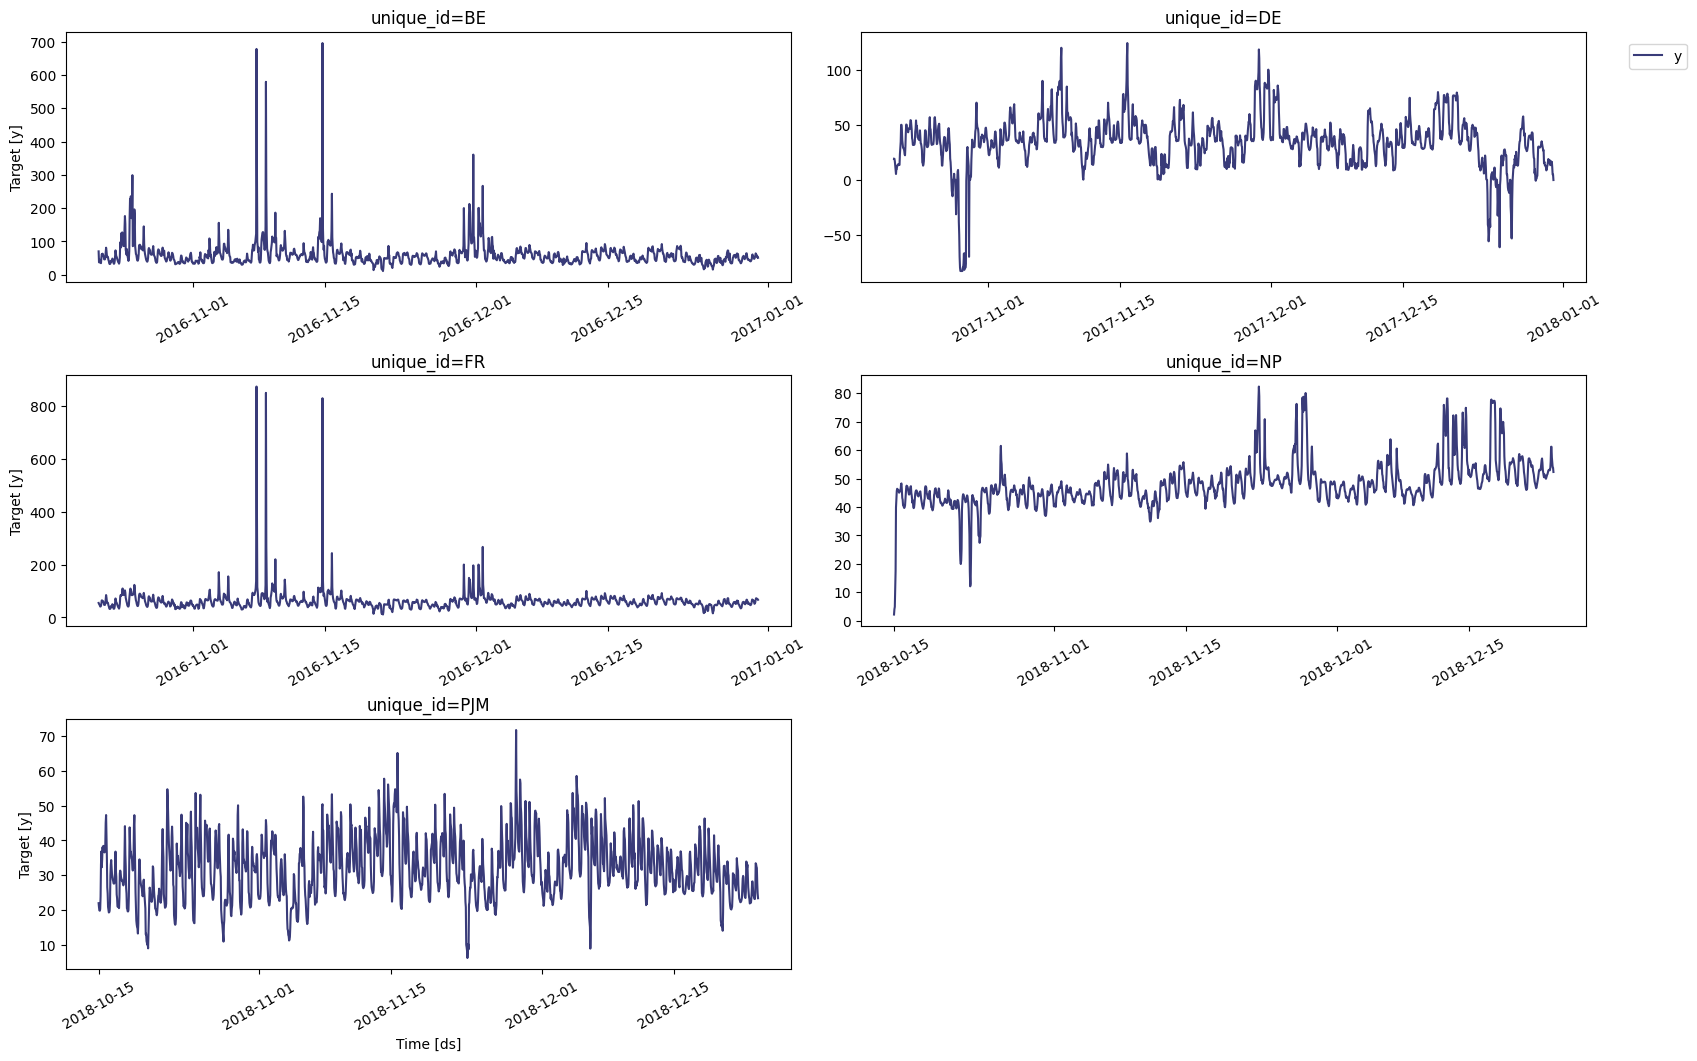

In [15]:
nixtla_client.plot(df)

In [16]:
timegpt_fcst_multiseries_df = nixtla_client.forecast(df=df, h=24, level=[80, 90])
timegpt_fcst_multiseries_df.head()

,unique_id,ds,TimeGPT,TimeGPT-hi-80,TimeGPT-hi-90,TimeGPT-lo-80,TimeGPT-lo-90
0,BE,2016-12-31 00:00:00,45.190674,54.872640,57.369972,35.508710,33.011375
1,BE,2016-12-31 01:00:00,43.244910,51.113556,56.101364,35.376266,30.388454
2,BE,2016-12-31 02:00:00,41.958893,48.577103,54.632137,35.340683,29.285650
3,BE,2016-12-31 03:00:00,39.796677,47.265984,49.683872,32.327370,29.909481
4,BE,2016-12-31 04:00:00,39.204560,47.410786,47.677520,30.998333,30.731598


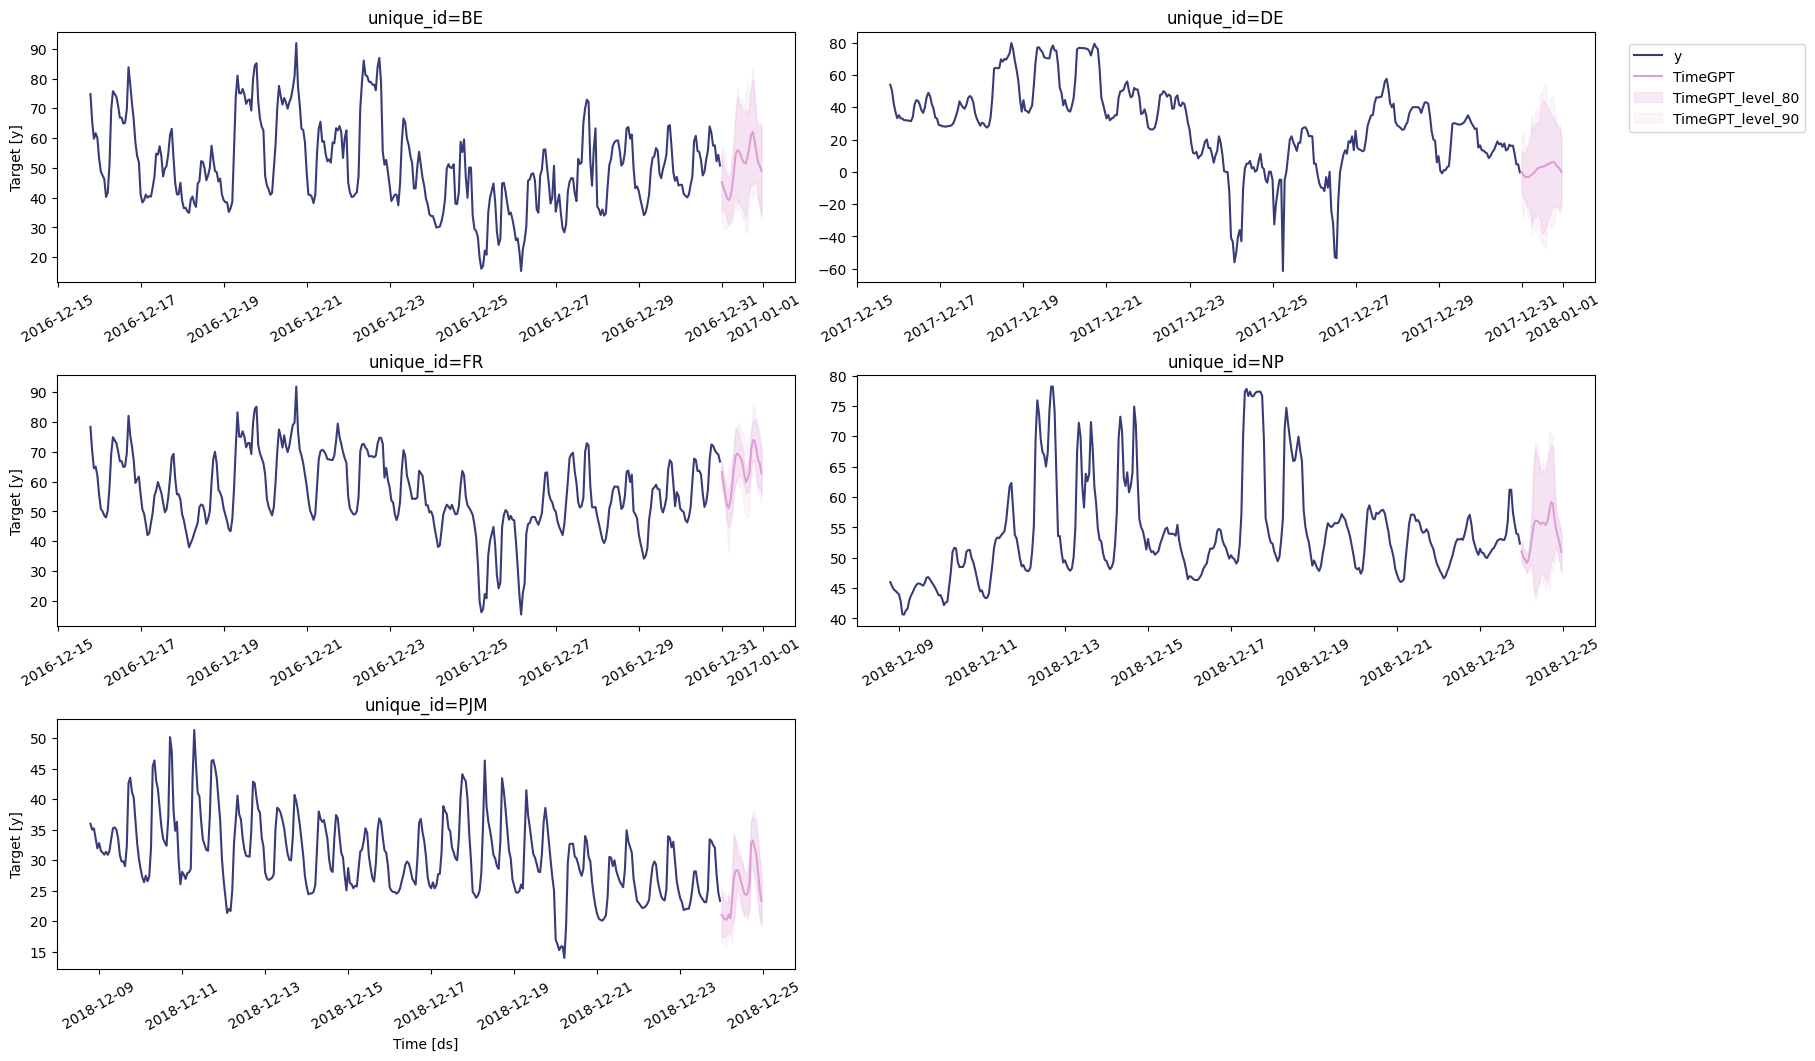

In [17]:
nixtla_client.plot(df, timegpt_fcst_multiseries_df, max_insample_length=365, level=[80, 90])

In [18]:
timegpt_fcst_multiseries_with_history_df = nixtla_client.forecast(df=df, h=24, level=[80, 90], add_history=True)
timegpt_fcst_multiseries_with_history_df.head()

,unique_id,ds,TimeGPT,TimeGPT-hi-80,TimeGPT-hi-90,TimeGPT-lo-80,TimeGPT-lo-90
0,BE,2016-10-27 00:00:00,56.070840,98.19227,110.133100,13.949413,2.008574
1,BE,2016-10-27 01:00:00,52.413340,94.53477,106.475610,10.291916,-1.648923
2,BE,2016-10-27 02:00:00,52.804714,94.92614,106.866980,10.683289,-1.257551
3,BE,2016-10-27 03:00:00,52.582287,94.70371,106.644554,10.460861,-1.479978
4,BE,2016-10-27 04:00:00,52.666283,94.78771,106.728546,10.544857,-1.395982


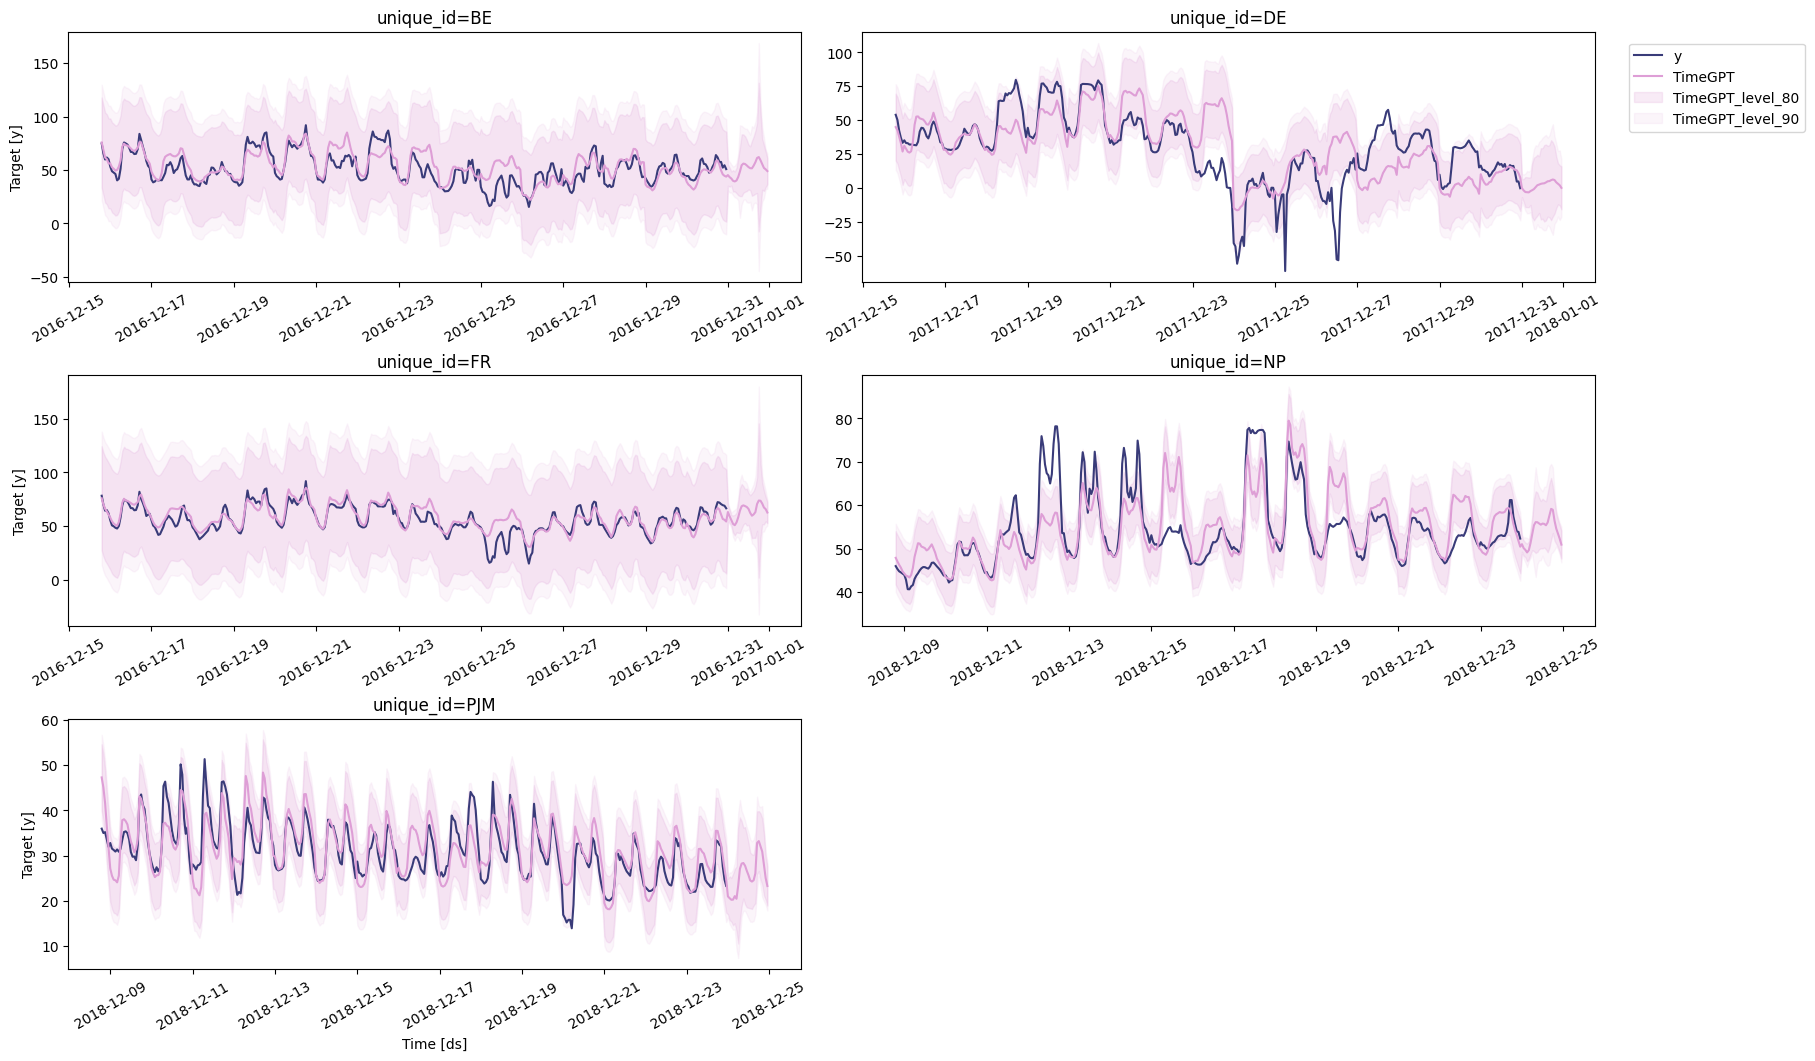

In [19]:
nixtla_client.plot(
    df,
    timegpt_fcst_multiseries_with_history_df.groupby('unique_id').tail(365 + 24),
    max_insample_length=365,
    level=[80, 90],
)